In [206]:
import math
import matplotlib.pyplot as plt
import random
plt.rcParams['figure.figsize'] = [10, 5]

In [11]:
class spring2D:
    def __init__(self, a, b, length):
        self.a = a #1st end point
        self.b = b #2nd end point
        self.length = length
    
    def __str__(self):
        return "({}, {}, {:.3})".format(self.a, self.b, self.length)

In [30]:
class vector2D:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
        
    def __str__(self):
        return "({:.3f}, {:.3f})".format(self.x, self.y)
    
    def multiply(self, c):
        return vector2D(self.x * c, self.y * c)
    
    def divide(self, c):
        return vector2D(self.x / c, self.y / c)
    
    def add(self, v):
        return vector2D(self.x + v.x, self.y + v.y)
    
    def sub(self, v):
        return vector2D(self.x - v.x, self.y- v.y)
    
    def lenght(self):
        return math.sqrt(self.x ** 2 + self.y ** 2)
    
    def distance(self, v):
        return math.sqrt((self.x - v.x) ** 2 + (self.y - v.y) ** 2)

In [212]:
class polygon2D:
    def __init__(self, points, force = vector2D()):
        self.points = points
        self.n = len(points)
        self.forces = []
        self.springs = []
        for i in range(self.n):
            self.forces.append(vector2D(force.x, force.y))
            for j in range(i + 1, self.n):
                self.springs.append(spring2D(i, j, self.points[i].distance(self.points[j])))
                
    def set_points(self, points):
        self.points = points
        
    def set_forces(self, forces):
        self.forces = forces
        
    def __str__(self):
        point = "{}".format(self.points[0])
        force = "{}".format(self.forces[0])
        spring = "{}".format(self.springs[0])
        for i in range(1, self.n):
            point += ", {}".format(self.points[i])
            force += ", {}".format(self.forces[i])
        for i in range(1, len(self.springs)):
            spring += ", {}".format(self.springs[i])
        return "Points: {}\nForces: {}\nSprings: {}".format(point, force, spring)

    def display(self):
        x, y = [], []
        for i in range(self.n):
            x.append(self.points[i].x)
            y.append(self.points[i].y)
        plt.fill(x, y)
        #plt.axis('equal')
        plt.xlim(0, 800)
        plt.ylim(0, 400)
        plt.show()
        plt.clf()

    def save_display(self, num):
        x, y = [], []
        for i in range(self.n):
            x.append(self.points[i].x)
            y.append(self.points[i].y)
        plt.fill(x, y)
        #plt.axis('equal')
        plt.xlim(0, 800)
        plt.ylim(0, 400)
        plt.savefig("img_seq\{}.png".format(num))
        plt.clf()
        
    #apply forces and move
    def update(self):
        p, f = [], []
        p += self.points
        f += self.forces
        #gravity
        for i in range(self.n):
            f[i].y -= 0.05
            
        #springs
        for s in self.springs:
            dist = p[s.a].distance(p[s.b])
            if dist > 0:
                force = p[s.b].sub(p[s.a])
                force = force.divide(dist)
            else:
                force = vector2D(random.random(), random.random())
            diff = dist - s.length
            diff = 0.001 * diff ** 4
            #diff = 0.01 * diff ** 2
            force = force.multiply(diff)
            if dist < s.length:
                f[s.a] = f[s.a].sub(force)
                f[s.b] = f[s.b].add(force)
            else:
                f[s.a] = f[s.a].add(force)
                f[s.b] = f[s.b].sub(force)
                
        #collision
        for i in range(self.n):
            if p[i].y < 0:
                p[i].y = 0.000001
                f[i].x *= 0.9
                f[i].y *= -0.9
                
        #force degradation
        for i in range(self.n):
            f[i] = f[i].multiply(0.99)
            
        #move points
        for i in range(self.n):
            p[i] = p[i].add(f[i])
            
        #give back values
        self.set_points(p)
        self.set_forces(f)

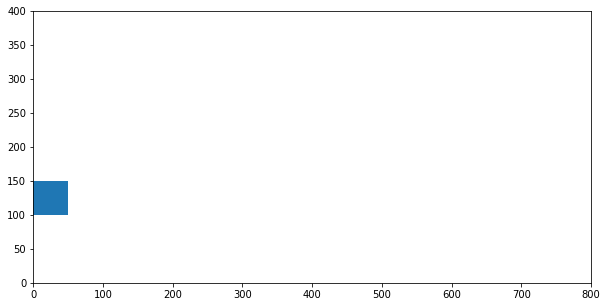

<Figure size 720x360 with 0 Axes>

In [215]:
p = polygon2D(points = [vector2D( 0, 100),
                        vector2D(50, 100),
                        vector2D(50, 150),
                        vector2D( 0, 150)],
              force = vector2D(x = 5))
p.display()

In [216]:
p.save_display(0)
for frame in range(1, 300):
    p.update()
    p.save_display(frame)

<Figure size 720x360 with 0 Axes>

In [148]:
for i in range(70):
    p.update()

Points: (330.791, 56.908), (381.298, 53.028), (385.269, 99.673), (338.315, 107.177)
Forces: (1.406, -0.075), (1.626, 0.150), (1.196, -0.492), (1.346, 0.656)
Springs: (0, 1, 50.0), (0, 2, 70.7), (0, 3, 50.0), (1, 2, 50.0), (1, 3, 70.7), (2, 3, 50.0)


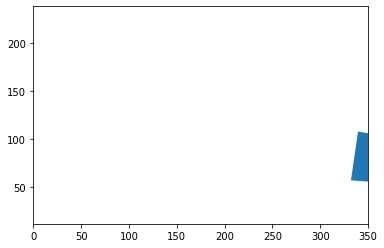

Points: (332.179, 56.781), (382.902, 53.021), (386.499, 99.235), (339.608, 107.787)
Forces: (1.389, -0.126), (1.604, -0.007), (1.231, -0.438), (1.294, 0.610)
Springs: (0, 1, 50.0), (0, 2, 70.7), (0, 3, 50.0), (1, 2, 50.0), (1, 3, 70.7), (2, 3, 50.0)


<Figure size 432x288 with 0 Axes>

In [196]:
print(p)
p.update()
p.display()
print(p)